<a href="https://colab.research.google.com/github/RandomAnass/Tutorials-Jupyter-books/blob/main/TP1_Simulation_enonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 - Simulation de variables aléatoires

In [ ]:
%matplotlib inline
import numpy as  np   
import scipy as sp
from pylab import *
import numpy.random as rd 
import scipy.special as spc

## Exercice 1 - Simulation de lois de Bernoulli et de lois binomiales

On rappelle qu'une variable de Bernoulli de paramètre $p$ prend la valeur $1$ avec la probabilité $p$, et $0$ avec la probabilité $(1-p)$.

Une variable binomiale de paramètres $(n,p)$ peut être vue comme la somme de $n$ v.a. indépendantes de loi de Bernoulli de paramètre $p$.

> **Question 1.**
En utilisant des [variables uniformes](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.uniform.html) sur $[0,1]$, construire une fonction <code>bernp()</code> qui renvoie $n$ réalisations indépendantes d'une variable de Bernoulli de paramètre $p$ .
Vérifier le bon fonctionnement de cette fonction en affichant les proportions de 0 et 1 obtenus pour $n=100$. 

In [ ]:
from numpy import random 
def bernp(p,n):
  L=[]
  for i in range(n):
    x=random.random()
    L.append((x<p))
  return L
print("pour n=100")
p=0.1
print("pour p=",p,"on trouve :",bernp(p,100).count(1)/len(bernp(p,100)))
p=0.75
print("pour p=",p,"on trouve :",bernp(p,100).count(1)/len(bernp(p,100)))
print("pour n=1000")
p=0.69
print("pour p=",p,"on trouve :",bernp(p,1000).count(1)/len(bernp(p,1000)))

pour n=100
pour p= 0.1 on trouve : 0.09
pour p= 0.75 on trouve : 0.71
pour n=1000
pour p= 0.69 on trouve : 0.692


> **Question 2.**
Construire une fonction <code>binnp1(n,p)</code> qui renvoie une réalisation d'une variable binomiale de paramètres $n$ et $p$.

In [ ]:
def binnp1(p,n):
  return np.sum(bernp(p,n))

binnp1(0.8,1000)

799

> **Question 3.**
Construire enfin une fonction <code>binnpk(k,n,p)</code> qui renvoie $k$ réalisations indépendantes d'une variable binomiale de paramètres $n$ et $p$. 

In [ ]:
def binnpk(k,n,p):
  return [binnp1(p,n) for k_index in range(k)]

binnpk(25,1000,0.66)

[690,
 663,
 668,
 679,
 667,
 657,
 661,
 657,
 668,
 656,
 653,
 671,
 672,
 679,
 661,
 678,
 657,
 645,
 662,
 665,
 664,
 654,
 670,
 645,
 645]

> **Question 4.**
Lorsque $n \rightarrow \infty$ et $np \rightarrow \lambda$ (et donc $p \rightarrow 0$), on sait que la loi Binomiale de paramètres $n$ et $p$ converge en loi vers une loi de Poisson de paramètre $\lambda$.   
- Générer $N_{sim}=10000$ réalisations indépendantes d'une loi binomiale de paramètres $n$ et $p$.   
- Représenter l'histogramme de l'échantillon ainsi obtenu (utiliser la fonction <code>[hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)</code>).   
- Superposer sur ce dernier les valeurs des probabilités [d'une loi binomiale](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.binom.html) de paramètre $n$ et $p$ ainsi que les valeurs des probabilités d'une [loi de Poisson]() de paramètre $np$. On pourra utiliser la fonction [scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).
- Représenter ces graphiques pour (n,p) = (10,1/2), (50,1/10), (100, 1/20) et (200, 1/40).  
- Commenter les résultats obtenus.  

In [ ]:
from scipy.stats import binom, poisson, norm

In [ ]:
Nsim= 10000
n=1000
p=0.69
list_binnpk=binnpk(Nsim,n,p)
np.array(list_binnpk)

array([692, 708, 690, ..., 704, 683, 684])

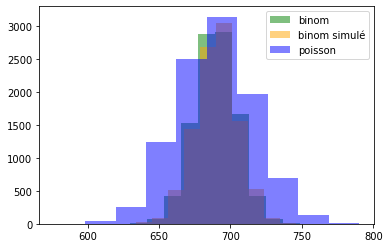

In [ ]:
import matplotlib.pyplot as plt
plt.hist(binom.rvs(n,p,size=Nsim),label="binom",color="green",alpha=0.5)
plt.hist(list_binnpk,label="binom simulé",color="orange",alpha=0.5)
plt.hist(poisson.rvs(n*p,size=Nsim),label="poisson",color="blue",alpha=0.5)
plt.legend(loc='upper right')
plt.show()

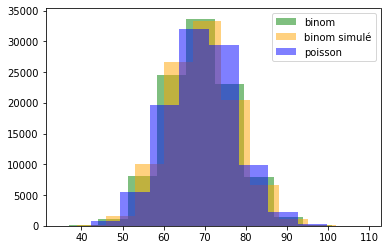

In [ ]:
Nsim= 100000
n=1000
p=0.069
list_binnpk=binnpk(Nsim,n,p)
np.array(list_binnpk)
plt.hist(binom.rvs(n,p,size=Nsim),label="binom",color="green",alpha=0.5)
plt.hist(list_binnpk,label="binom simulé",color="orange",alpha=0.5)
plt.hist(poisson.rvs(n*p,size=Nsim),label="poisson",color="blue",alpha=0.5)
plt.legend(loc='upper right')
plt.show()

pmf


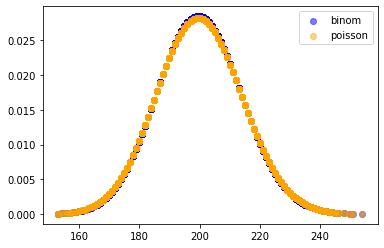

In [ ]:
print("pmf")
Nsim= 10000
n=10000
p=0.02
x=binnpk(Nsim,n,p)
y_binom_pmf=binom.pmf(x, n, p)
plt.scatter(x, y_binom_pmf,label="binom",color="blue",alpha=0.5)
y_poisson_pmf=poisson.pmf(x,n*p)
plt.scatter(x, y_poisson_pmf,label="poisson",color="orange",alpha=0.5)

plt.legend(loc='upper right')

plt.show()

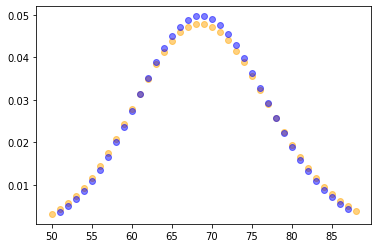

In [ ]:
mu=n*p
x1 = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
plt.scatter(x1, poisson.pmf(x1, mu),label="poisson",color="orange",alpha=0.5)
x2 = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
plt.scatter(x2, binom.pmf(x2, n, p),label="binom",color="blue",alpha=0.5)

> **Question 4.** 
Lorsque $p$ est fixé et $n$ grand, par quelle loi peut-on approcher la loi binomiale de paramètres $n$ et $p$ ?   
Illustrer cette convergence en procédant comme dans la question précédente.

Normal par le théorème central limite

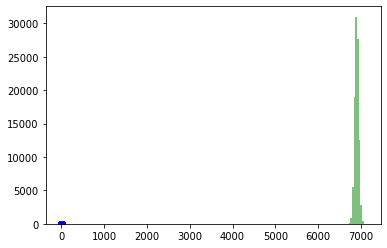

In [ ]:
n=10000
p=0.69

x1=np.linspace(-10,10,1000)
plt.hist(binom.rvs(n,p,size=Nsim),label="binom",color="green",alpha=0.5)
x2 = np.linspace(-10,10,1000)
plt.scatter(x2, norm.pdf(x2,n*p, n*p*(1-p)),label="norm",color="blue",alpha=0.5) #pdf

## Exercice 2 - Simulation d'une loi triangulaire par la méthode d'inversion
On considère la loi de densité triangulaire $f$ suivante:
$$ f(x)=0,\, \text{si}\, x\leq 0 $$
$$ f(x)=x,\, \text{si}\, x \in ]0,1]$$
$$ f(x)=2-x,\, \text{si}\, x\in ]1,2]$$
$$ f(x)=0,\, \text{si}\, x \geq 2$$

> **Question 1.** Utilisez la méthode d’inversion pour simuler des variables aléatoires dont la loi a pour densité la fonction triangulaire f définie ci-dessus. 

> **Question 2.** Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité f.

## Exercice 3 - Loi normale - Méthode de Box et Muller


En utilisant la méthode d'inversion, écrire une fonction $expol$ d'argument le paramètre $l$ qui renvoie $n$ variables exponentielle de paramètre $l$.

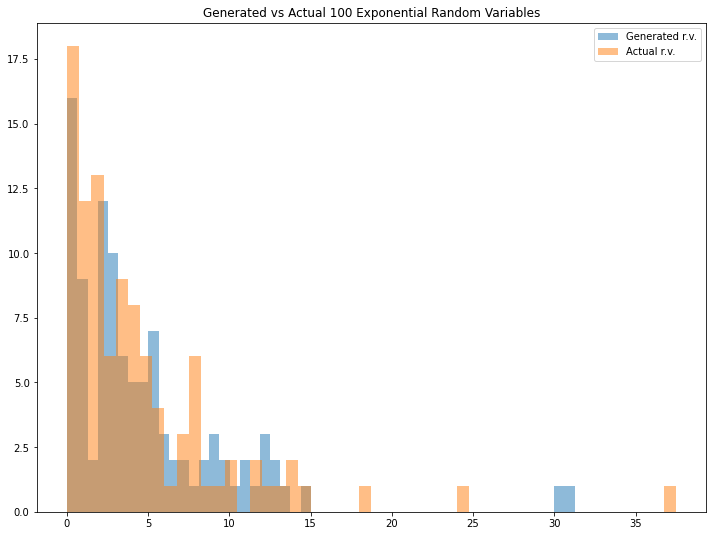

In [ ]:
from scipy.stats import uniform, expon
def expol(l,n):
    U=uniform.rvs(size=n)
    return -l*np.log(1-U)
l=5
n=100
X=expol(l,n)
actual=expon.rvs(size=n,scale=l)

plt.figure(figsize=(12,9))
plt.hist(X, bins=50, alpha=0.5, label="Generated r.v.")
plt.hist(actual, bins=50, alpha=0.5, label="Actual r.v.")
plt.title("Generated vs Actual %i Exponential Random Variables" %n)
plt.legend()
plt.show()


Écrire une fonction $normaleBM$ qui renvoie (dans une matrice) deux
vecteurs indépendants de taille $n$ de nombres aléatoires tirés
suivant la loi $\mathcal{N}(0,1)$ en utilisant l'algorithme de Box
et Muller. Vérifier graphiquement que les vecteurs obtenus ont bien la loi souhaitée.

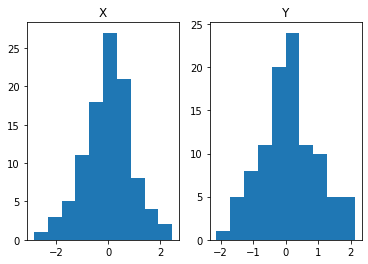

In [ ]:
def normaleB(n):
  U1 = np.random.uniform(size = n)
  U2 = np.random.uniform(size = n)
  R = np.sqrt(-2 * np.log(U1))
  Theta = 2 * np.pi * U2
  X = R * np.cos(Theta)
  Y = R * np.sin(Theta)
  return [X,Y]
X=normaleB(100)[0]
Y=normaleB(100)[1]
fig,(ax1,ax2) = plt.subplots(1,2)
temp = ax1.hist(X)
ax1.set_title("X")
temp = ax2.hist(Y)
ax2.set_title("Y")
plt.show()

Soit deux v.a. indépendantes normales centrées réduites $X$ et $Y$. Pour $a \in R$, calculer la covariance et la corrélation entre $X$ et $aX+ Y$. Proposer une fonction $normalecor$, d'argument $r \in [-1,1]$ et $n \in \mathbb{N}$ qui renvoie (dans une matrice) deux vecteurs de variables aléatoires de $\mathcal{N}(0,1)$ et de corrélation $r$ .
Vérifier que la corrélation empirique des vecteurs simulés est cohérente avec la valeur imposée $r$, et représenter le nuage des deux vecteurs. Qu'observe-t-on ? 

$Cov(X,aX+Y)=a.Var(x)-Cov(X,Y)$
X indep de Y alors $Cov(X,Y)=0$
Et $Var(X)=1$, Donc $Cov(X,aX+Y)=a$


In [ ]:
def normalecor(r,n):
  X=normaleB(n)[0]
  Z=r*X+normaleB(n)[1]
  return [X,Z]

np.cov(normalecor(0.5,100000))

array([[1.00153324, 0.50198313],
       [0.50198313, 1.25195886]])

## Exercice 4 - Simulation de la lois gamma par l'algorithme d'Ahrens et Dieters 

Cet exercice a pour objectif de simuler des variables aléatoires $\Gamma(a,b)$ avec $a,b>0$ quelconques, sans utiliser [numpy.random.gamma](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.gamma.html) évidemment. On sait (c.f. le cours) que ce probléme se raméne essentiellement à simuler une loi $\Gamma(a,1)$ avec $a < 1$. On note 
\begin{equation*}
f(x,a)=\frac{1}{\Gamma(a)} e^{-x} x^{a-1} \mathbb{1}_{[0,+\infty[}(x)
\end{equation*}

a densité de le loi $\Gamma(a,1)$.
Pour simuler selon cette loi (avec $a < 1$ fixé), on va appliquer une méthode de rejet en utilisant comme enveloppe la loi de densité sur $\mathbb{R}$

\begin{equation*}
g(x,a)=\frac{ae}{a+e}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+ e^{-x}\mathbb{1}_{[1,+\infty[}(x)\right).
\end{equation*}

En effet, on peut montrer que pour $c=(a+e)/(a e \Gamma(a))$, on a alors $ f(x,a) \leq c g(x,a)$ pour tout $x \in \mathbb{R}$. Puisque l'on sait simuler des variables aléatoire de densité $g$ (voir plus bas), il est donc possible de simuler des variables aléatoires de densité $f$ par la méthode de rejet dont on rappelle l'algorithme ci-dessous :

> #### Algorithme de rejet
- 1: Simuler :
 - $X$ de densité $g(\cdot,a)$ ;
 - $U$ de loi $\mathcal{U}([0,1])$ (indépendente de $X$) ;
- 2: Si $( c g(X,a)  U >  f(X,a) )$ 
 - Alors retourner en 1 (rejet) ; 
 - Sinon accepter $X$ comme un tirage aléatoire de densité de probabilité $f(\cdot,a)$.

> **Question 1 (Représentation de la densité $f$ et de son enveloppe).**

> **(1.a)** Créer deux fonction `f` et `g`  de paramètres $x$ et $a$ pour les deux densités définies plus haut.

In [ ]:
def f(X,a):
  X_out=[]
  for x in X:
    X_out.append((1/spc.gamma(a))*np.exp(-x)*(x**(a-1)*(x>0)))
  return np.array(X_out)
def g(x,a):
  X=[]
  for u in x:
    X.append(((a*np.exp(1))/(a+np.exp(1)))*((u**(a-1))*(0<u)*(u<1)+(np.exp(-u))*(u>=1)))
  return np.array(X)



> **(1.b)** Tracer la densité $f$ et la fonction $c g$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


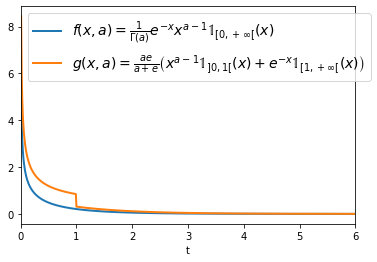

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a=0.5
c=2
t = np.linspace(0, 10, 1000)
f_t = f(t,a)
g_t = c*g(t,a)

plt.plot(t, f_t, linewidth=2, label=r"$f(x,a)=\frac{1}{\Gamma(a)} e^{-x} x^{a-1} \mathbb{1}_{[0,+\infty[}(x)$")
plt.plot(t, g_t, linewidth=2, label=r"$g(x,a)=\frac{ae}{a+e}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+ e^{-x}\mathbb{1}_{[1,+\infty[}(x)\right)$")
plt.xlim(0, 6)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()



## **Question 2 (Simulation selon la loi de densité $g$).**
On note $G(\cdot,a)$ la fonction de répartition associée à la densité $g(\cdot,a)$.

> **(2.a)** Ecrire une fonction `G`, dépendant de $x$ et $a$, qui renvoie la valeur de $G(x,a)$.  Écrire ensuite une fonction `Ginv`, dépendant de $z$ et $a$, qui renvoie l'inverse généralisée de la fonction $G(\cdot,a)$ :
\begin{equation*}
Ginv(z,a)=\left(\frac{a+e}{e} z\right)^{1/a} \mathbb{1}_{(z < \frac{e}{a+e})}-\log\left(\frac{a+e}{a e}(1- z)\right)\mathbb{1}_{(z \geq \frac{e}{a+e})} \:†.
\end{equation*}
Vérifier numériquement que $Ginv$ est bien l'inverse généralisée de $G$. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


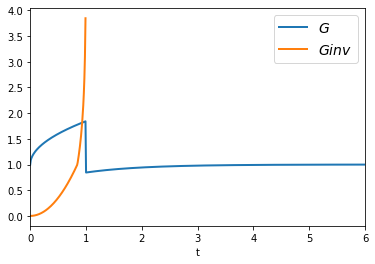

In [ ]:
def G(X,a):
  return np.array([(((np.exp(1)/(a+np.exp(1)))*(x**a))*(0<x<1))+(1-(((a*np.exp(1))/(a+np.exp(1)))*(np.exp(-x)))*(x>=1)) for x in X])

def Ginv(Z,a):
  Z_out=[]
  c1 = np.exp(1)/(a+np.exp(1))
  return np.array([(((1/c1)*z)**(1/a))*(z<c1)-np.log((1/(c1*a))*(1-z))*(z>=c1)for z in Z])

a= 0.5 
t= np.linspace(0, 10, 1000)
G_t = G(t,a)
Ginv_t = Ginv(t,a)

plt.plot(t, G_t, linewidth=2, label=r"$G$")
plt.plot(t, Ginv_t, linewidth=2, label=r"$Ginv$")
plt.xlim(0, 6)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


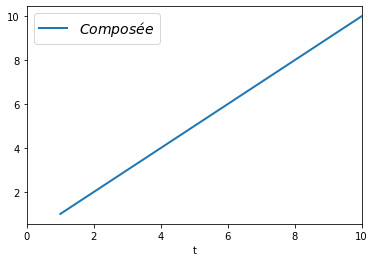

In [ ]:
t= np.linspace(0, 10, 1000)
G_t = G(t,a)
Ginv_t = Ginv(G_t,a)

plt.plot(t, Ginv_t, linewidth=2, label=r"$Composée$")
plt.xlim(0, 10)
plt.xlabel("t")
plt.legend(fontsize=14)
plt.show()

> **(2.b)** En utilisant la méthode d'inversion, créer un fonction `gLoi` permettant de simuler un échantillon de taille $n$ de variables aléatoire indépendantes de densité $g(\cdot,a)$. 

In [ ]:
def gLoi(n,a):
  U = np.random.uniform(size = n)
  return Ginv(U,a)

> **(2.c)**  Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité $g$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


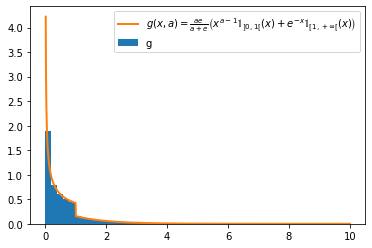

In [ ]:
Nsim= 100000
a=0.5
histo=gLoi(Nsim,a)

plt.hist(histo,50,label="g",density=1)
t= np.linspace(0, 10, 1000)
g_t = g(t,a)

plt.plot(t, g_t, linewidth=2, label=r"$g(x,a)=\frac{ae}{a+e}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+ e^{-x}\mathbb{1}_{[1,+\infty[}(x)\right)$")

plt.legend(loc='upper right')
plt.show()

> **Question 3 (Méthode de rejet  pour $a <1$).**  

> **(3.a)** Définir une fonction `gamrej`, dépendant de
$n$ et de $a$, qui renvoie pour tout $a < 1$ un vecteur de $n$ nombres
aléatoires tirés suivant la loi $\Gamma(a,1)$. 

In [ ]:
def gamrej(n,a):
  i =0
  Out=[]
  c=(a+e)/(a*np.exp(1)*spc.gamma(a))
  while i<n :
    Y=gLoi(n,a)
    for x in Y:
      u=np.random.uniform()
      z=c*g([x],a)[0]*u
      if z<(f([x],a)[0]):
        Out.append(x)
        i+=1
  return Out

In [ ]:
np.random.uniform()

0.25933000647671234

> **(3.b)** Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien é celle de la densité $\Gamma(a,1)$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


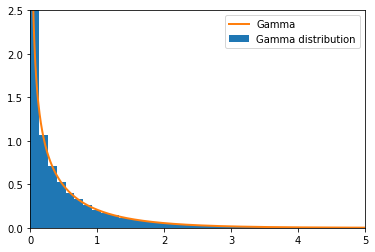

In [ ]:
Nsim= 100000
a=0.5
histo=gamrej(Nsim,a)

plt.hist(histo,70,label="Gamma distribution",density=1)
t= np.linspace(0, 5, 1000)
f_t = f(t,a)

plt.plot(t, f_t, linewidth=2, label=r"Gamma")
plt.xlim(0, 5)
plt.ylim(0, 2.5)
plt.legend(loc='upper right')
plt.show()

> **Question 4 (Efficacité de l'algorithme de rejet).**
 On souhaite évaluer "l'efficacité" de l'algorithme de rejet selon
  l'enveloppe $g(\cdot,a)$ choisie.
  
> **(4.a)** Modifier la fonction  `gamrej `pour obtenir aussi en  sortie un vecteur de taille $n$ donnant, pour chaque  variable
  aléatoire tirée selon la loi $\Gamma(a,1)$, le nombre d'essais qui a été nécessaire (i.e le nombre de passages dans la boucle avant une réussite).

In [ ]:
def gamrej(n,a):
  i =0
  Out=[]
  Out_necess=[]
  c=(a+e)/(a*np.exp(1)*spc.gamma(a))
  k=0
  while i<n :
    Y=gLoi(n,a)
    for x in Y:
      u=np.random.uniform()
      z=c*g([x],a)[0]*u
      if z<(f([x],a)[0]):
        Out.append(x)
        i+=1
        k+=1
        Out_necess.append(k)
        k=0
      else:
        k+=1
  return Out,Out_necess

> **(4.b)** Vérifier graphiquement que la loi du nombre d'essais nécessaire est une loi géométrique de paramètre $1/c$

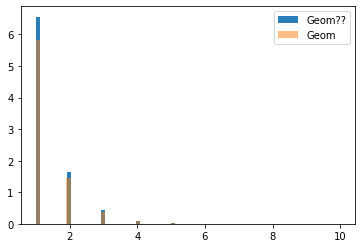

In [ ]:
Nsim= 100000
a=0.5
c=(a+e)/(a*np.exp(1)*spc.gamma(a))
histo1,histo2=gamrej(Nsim,a)
hist3= np.random.geometric(p=1/c, size=100000)
plt.hist(histo2,70,label="Geom??",density=1,alpha=0.95)
plt.hist(hist3,70,label="Geom",density=1,alpha=0.5)


plt.legend(loc='upper right')
plt.show()

> **Question 5 (Utilisation d'une autre fonction majorante).**
On propose d'utiliser l'algorithme de rejet avec une seconde fonction  :
  \begin{equation*}
  g_2(x,a)=\frac{a}{a+1}\left(x^{a-1} \mathbb{1}_{]0,1[}(x)+
  \frac{1}{x^2}\mathbb{1}_{[1,+\infty[}(x)\right). 
  \end{equation*}
 
> **(5.a)** Vérifiez que $g_2$ est une densité et trouver une constante $c_2$ telle que  $
  f(x,a) \leq c_2 g_2(x,a)$ pour tout $x \in \mathbb{R}$.
  Sur un même graphique, tracer la densité $f$, la fonction $c g$ et  la fonction $c_2 g_2$. 

> **(5.b)** Pour simuler une loi $\Gamma(a,1)$ par la méthode du rejet, laquelle des deux enveloppes $c_2 g_2$ et  $c g$ est-il préférable de choisir ?

> **(5.c)** Créer une fonction permettant de simuler une  variable aléatoire de densité $g_2(\cdot,a)$ en utilisant la méthode  d'inversion. 

> **(5.d)** Définir une fonction `gamrej2`, similaire à la fonction
  `gamrej`,  pour simuler un vecteur de $n$ nombres aléatoires tirés
  suivant la loi $\Gamma(a,1)$. 

> **(5.e)** Vérifiez graphiquement que la loi des variables aléatoires obtenues correspond bien à celle de la densité $\Gamma(a,1)$.

> **(5.f)** Comparer l'efficacité des algorithmes de rejet lorsqu'on utilise les enveloppes $g$   et $g2$. 

> **Question 6 - Simulation de lois exponentielles.**
En utilisant  la méthode d'inversion, écrire une fonction `expo` d'arguments de paramètre $l$ et un entier $n$, qui renvoie $n$ variables exponentielle de paramètre $l$. 

> **Question 7 - Simulation de lois Gamma dans le cas général**

> **(7.a)** En utilisant  la fonction `expol`, définir une fonction `gamp` d'arguments $n\in \mathbb{N}$ et $b>0$ et $p \in \mathbb{N}$, qui renvoie $n$ réalisations de la loi $\Gamma(p,b)$.

> **(7.b)** En utilisant les fonctions `gamrej` et `gamp`, définir une fonction `gamma_gen` d'arguments $n\in \mathbb{N} $, $a>0$ et $b>0$, qui renvoie $n$ réalisations de la loi Gamma(a,b).

> **(7.c)** Vérifier graphiquement que les variables simulées ont bien la loi souhaitée.